In [5]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Time Series Decomposition

In [40]:
df = pd.read_csv("weather_data/BanjaraHills_6M.csv")

In [41]:
df.head()

,city_name,locality_name,device_date_time,rain_intensity,rain_accumulation,humidity,temperature,wind_direction,wind_speed
0,Hyderabad,Banjara Hills,2024-12-05 23:59:00,0.0,0.0,79.51,24.99,77.8,0.26
1,Hyderabad,Banjara Hills,2024-12-05 23:58:00,0.0,0.0,79.41,24.99,140.4,0.85
2,Hyderabad,Banjara Hills,2024-12-05 23:57:00,0.0,0.0,79.63,24.99,38.7,0.32
3,Hyderabad,Banjara Hills,2024-12-05 23:56:00,0.0,0.0,79.38,24.99,52.3,0.14
4,Hyderabad,Banjara Hills,2024-12-05 23:55:00,0.0,0.0,79.41,24.99,153.6,0.49


In [42]:
df["date"] = df["device_date_time"]
df['date'] = pd.to_datetime(df['date'])
df = df[["date", "temperature"]] 
df.set_index('date', inplace=True)

In [48]:
df = df.resample("D").mean()
df["temperature"].fillna(method='ffill', inplace=True)

C:\Users\Ditipriya Dutta\AppData\Local\Temp\ipykernel_23844\3799359272.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["temperature"].fillna(method='ffill', inplace=True)
C:\Users\Ditipriya Dutta\AppData\Local\Temp\ipykernel_23844\3799359272.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["temperature"].fillna(method='ffill', inplace=True)


In [49]:
df.sort_index(inplace=True)

In [50]:
result = seasonal_decompose(df['temperature'], model='multiplicative', period=30)  # Adjust 'period' based on your data

In [51]:
trend = result.trend
seasonal = result.seasonal
residual = result.resid

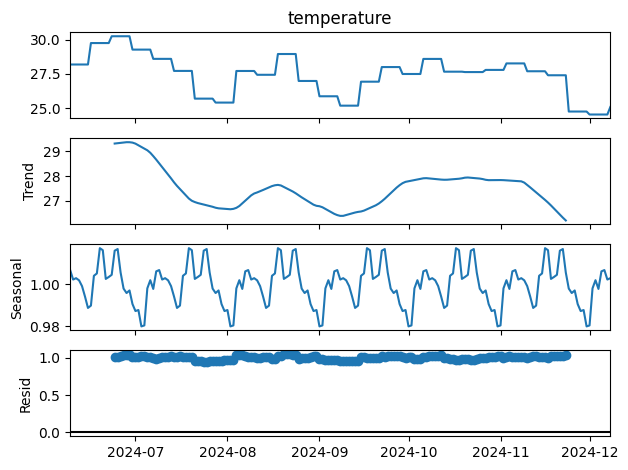

In [52]:
result.plot()
plt.show()

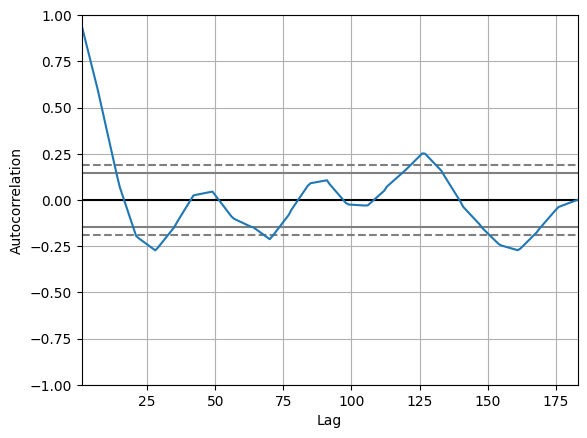

In [55]:
x= pd.plotting.autocorrelation_plot(df['temperature'])

<Axes: xlabel='date'>

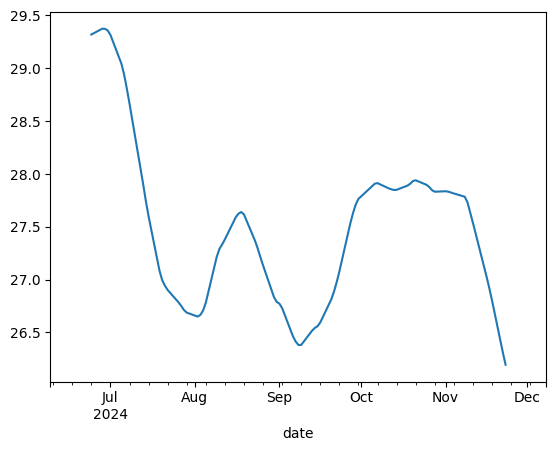

In [54]:
trend.plot()